<a href="https://www.kaggle.com/code/mingtr/market-insights-for-a-store-pre-launching?scriptVersionId=94641416" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Context & purposes: 
- Quick market reseach for (house/architecture) painting products for an online shop (entity in Germany).
- Product characteristics: handmade, maybe digital or painting on paper, based on real life house photo
- Finding the trends and nessesary information focus on products and prices on Etsy, the biggest hand-made market available now.

# Questions
- In categories of art/painting, what type of painting is popular?
- What tags are most searched?
- How fast a store can be (revenues from released date of the product)?
- Popular range of prices for the product? 
- What do successful stores have in common?

# Answers to the questions
After doing the analysis, there are some conclusion as below: 

- Price: for the well performed stores, the most popular is €30-€41, following by €17-€25. The cheapest price should be €10, but lowring your price will not make your product more appealing, and it does not help to boost more favorites/sales/reviews.

- Categories of *painting from photo* is still favorable on the market (Etsy)

- Demand for house painting is not high, showing increase during Oct - Nov - Dec, and may be in September and March

- high competitive in 2022: about 25% of stores starting to have revenues of over €300 after at least 9 months running on Etsy

- Keywords/tags to use: check the list of tt and tag 

- Sign of becoming a best seller: selling of 3-4 items per week

- The number of reviews and fovorites are more important at the begining of running the business: the minimum favorites is 15.

# Data analysis in detail
In this part I present all the steps to find out the answers/insights above.

## General info extracted

In [1]:
! pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.2/242.2 KB 1.4 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_excel('../input/dataset-of-a-handmade-product/information.xlsx')
df3 = pd.read_excel('../input/dataset-of-a-handmade-product/Similar-Keywords-Paintings.xlsx', header=1)
df4 = pd.read_excel('../input/dataset-of-a-handmade-product/Haus-geschenk.xlsx', header=2,index_col=0)
df5 = pd.read_excel('../input/dataset-of-a-handmade-product/house-gift.xlsx', header=2,index_col=0)

### The overview of the hand-made painting market

In [4]:
df1.head()

,title,"price(""$"")",weekly_sales,total_sales,reviews,favorites,tags,Ship From,release time,Best Seller,Etsy pick,Raving,store name,product_url
0,"Home portrait, house painting, housewarming gi...",24.99,21,587,89,1508,"Home portrait,house painting,housewarming gift...",United States,NaN,yes,no,yes,WAIdecor,https://www.etsy.com/listing/1176417219/home-p...
1,"House Watercolor, Wedding Gift, New Home Gift,...",130.00,20,1119,110,37921,"Christmas gift,House portrait,house watercolor...",United States,2019-10-14,no,yes,no,PublicHouseCo,https://www.etsy.com/listing/469680938/house-w...
2,"Personalized Watercolor House Portrait, Hand-P...",29.50,20,3184,804,7026,"Painting Watercolor,house portrait,portrait di...",United States,2020-07-01,yes,no,yes,Latoyaer,https://www.etsy.com/listing/818493954/persona...
3,"Custom House Portrait, Housewarming Gift, Real...",14.49,14,723,296,1239,"Realtor Closing Gift,New Home Gift,Custom Port...",United States,2021-08-07,yes,no,yes,ArtistQuality,https://www.etsy.com/listing/1062203471/custom...
4,"Custom Watercolor House Portrait From Photo, H...",26.06,10,459,67,1193,"house painting,custom home portrait,housewarmi...",Canada,2021-07-23,yes,no,yes,Premvy,https://www.etsy.com/listing/1055153214/custom...


In [5]:
# rename column of price 
df1.rename(columns = {'price("$")':'price'}, inplace = True)

# convert time 
df1['year'] = pd.to_datetime(df1['release time'])

# calculate (estimated) revenue 
df1['es_revenue'] = df1['total_sales']*df1['price']

In [6]:
df1.describe()

,price,weekly_sales,total_sales,reviews,favorites,es_revenue
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,77.404133,0.263333,40.883333,13.171667,205.441667,2207.967167
std,72.986638,1.752839,207.201667,73.896504,1759.427382,10745.864618
min,6.280000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.980000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,99.000000,0.000000,6.000000,0.000000,33.000000,292.500000
max,480.000000,21.000000,3184.000000,1230.000000,37921.000000,145470.000000


- price: lowest is €6.2, highest is €480, average is €77
- if the listing price is €99, means that the price is already higher than 75% of the sample listing prices. Selling hand made products doesn't mean that you can make the price too high.
- weekly_sales: highest is 21 items.
- es_revenue: average is €2207

In [7]:
df1.nunique()

title           492
price           234
weekly_sales     12
total_sales      99
reviews          57
favorites       147
tags            495
Ship From        19
release time    237
Best Seller       2
Etsy pick         2
Raving            2
store name      277
product_url     600
year            237
es_revenue      176
dtype: int64

In [8]:
df1.isnull().sum()

title             0
price             0
weekly_sales      0
total_sales       0
reviews           0
favorites         0
tags              0
Ship From         6
release time    274
Best Seller       0
Etsy pick         0
Raving            0
store name        0
product_url       0
year            274
es_revenue        0
dtype: int64

### Which categories of paintings is popular?

In [9]:
df3.head(25).sort_values(by='SALES')

,KEYWORD,VIEWS,COMPETITION,FAVORITES,SALES
21,whale painting,6180553,4843,10410,1946
18,Color painting,7043858,50100,13589,2043
16,blue painting,7358964,0,13518,2202
2,Painting Abstract,10000488,50100,9282,2314
24,watercolor painting,6043916,50100,21194,2454
14,Floral Painting,7517650,0,15899,2470
4,tree painting,9093242,50100,10432,2511
20,animal painting,6603287,50100,12136,2548
22,vintage oil painting,6127604,45498,11855,2855
8,vintage painting,8970993,50100,13880,2879


- Categories with the most sales are: *landscape painting, living room painting, modern painting, painting from photo, office painting,abstract painting, canvas painting*
- House painting that our store are aiming to launch belongs to *painting from photo* categories.

### Time of the year with increasing demand for the product

In [10]:
# df4 is the data the google search keywords 'Haus geschenk' in Germany only
df4.head()

,Haus geschenk: (Germany)
Week,
2017-05-07,0
2017-05-14,0
2017-05-21,0
2017-05-28,56
2017-06-04,56


<AxesSubplot:xlabel='Week'>

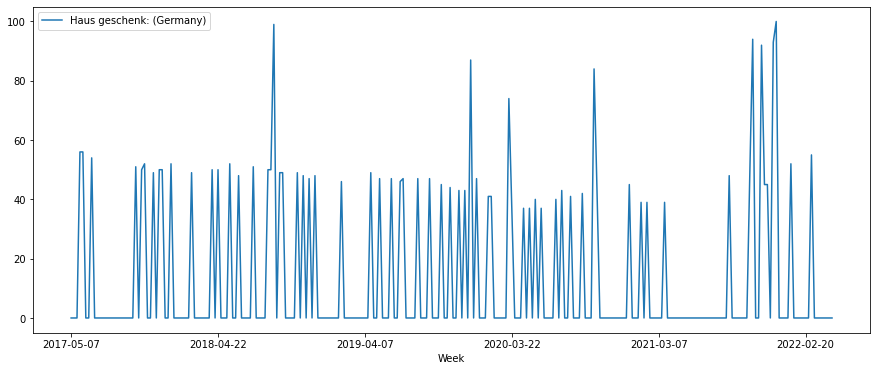

In [11]:
df4.plot(kind='line',figsize=(15, 6))

In [12]:
df_high_search = df4[(df4['Haus geschenk: (Germany)'] >=40)]
df_high_search.head()

,Haus geschenk: (Germany)
Week,
2017-05-28,56
2017-06-04,56
2017-06-25,54
2017-10-08,51
2017-10-22,50


- we can see that only a few times in a year that the demand of products increase.

In [13]:
# filter out which month has the increased demand
df_high_search = df_high_search.reset_index() 
df_w = df_high_search['Week'].str.split('-', expand=True)
df_high_search = pd.concat([df_high_search, df_w], axis=1)
df_high_search.drop(columns=[2,'Week'],inplace=True)
df_high_search.rename({0:'year', 1:'month'}, axis=1, inplace=True )

In [14]:
print(df_high_search.year.value_counts())
print(df_high_search.month.value_counts())

2018    15
2019    14
2020    11
2017    10
2021     8
2022     2
Name: year, dtype: int64
10    10
12    10
11     7
06     5
08     5
09     5
05     4
07     4
02     3
04     3
01     2
03     2
Name: month, dtype: int64


- If 2022 is not considered, each year there are about 10 times that the demand for 'house gift' increases
- The demand increases at the end of the year: Oct - Nov - Dec are 3 months appear the most.

AxesSubplot(0.125,0.125;0.775x0.755)


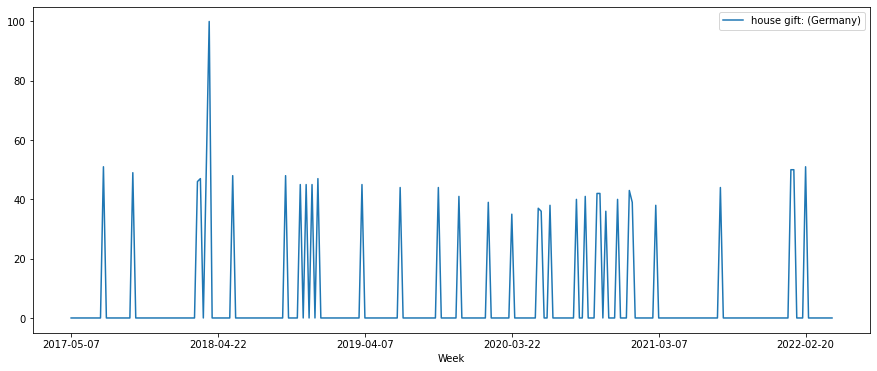

In [15]:
# Check the same things for the df5 (with keywords in English, not German)
print(df5.plot(kind='line',figsize=(15, 6)))
df_high_search_5 = df5[(df5['house gift: (Germany)'] >=40)]

There is the difference (that can be seen from the plot) in using keywords in German and English.

In [16]:
# filter out which month has the increased demand
df_high_search_5 = df_high_search_5.reset_index() 
df_w5 = df_high_search_5['Week'].str.split('-', expand=True)
df_high_search_5 = pd.concat([df_high_search_5, df_w5], axis=1)
df_high_search_5.drop(columns=[2,'Week'],inplace=True)
df_high_search_5.rename({0:'year', 1:'month'}, axis=1, inplace=True )
# check the frequency
print(df_high_search_5.year.value_counts())
print(df_high_search_5.month.value_counts())

2018    10
2020     6
2019     4
2022     3
2017     2
2021     1
Name: year, dtype: int64
03    4
11    4
10    3
09    3
12    3
08    2
01    2
07    1
04    1
05    1
06    1
02    1
Name: month, dtype: int64


- The trend is the same (irrespective of the keyword languages). Additionally, September and March is also in the high demand time.

### Correlation among (numeric) features

<AxesSubplot:>

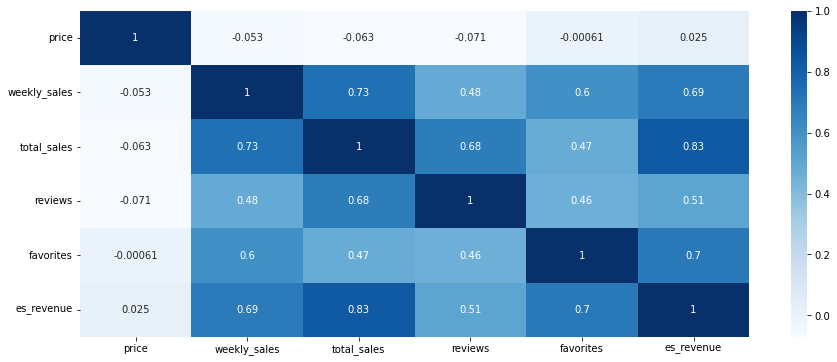

In [17]:
plt.figure(figsize=(15,6))        
sns.heatmap(df1.corr(), annot=True, cmap="Blues")

It can be seen from the heatmap that:
- Understandable high correlation: 
    - revenue, total sales
    - revenue, favorites
    - reviews, total sales
- Noticeable pairs of low correlation:
    - price vs sales, reviews, favorites, revenues. It means that for a handmade product, cheap price does not make it become appealing!
 

## Analysis on the highest revenue stores

In [18]:
# filter out the stores with the higest revenues
df1.sort_values(by="es_revenue", ascending=False).head()

,title,price,weekly_sales,total_sales,reviews,favorites,tags,Ship From,release time,Best Seller,Etsy pick,Raving,store name,product_url,year,es_revenue
1,"House Watercolor, Wedding Gift, New Home Gift,...",130.00,20,1119,110,37921,"Christmas gift,House portrait,house watercolor...",United States,2019-10-14,no,yes,no,PublicHouseCo,https://www.etsy.com/listing/469680938/house-w...,2019-10-14,145470.0
5,"Custom home portrait, house painting, housewar...",85.00,10,1681,264,4248,"Mothers day,house portrait,1st anniversary gif...",United States,2019-10-13,yes,no,yes,LighthouseSketchbook,https://www.etsy.com/listing/481228259/custom-...,2019-10-13,142885.0
2,"Personalized Watercolor House Portrait, Hand-P...",29.50,20,3184,804,7026,"Painting Watercolor,house portrait,portrait di...",United States,2020-07-01,yes,no,yes,Latoyaer,https://www.etsy.com/listing/818493954/persona...,2020-07-01,93928.0
11,"Our First Home Portrait, Watercolor Effect on ...",36.74,4,2075,760,3809,"Wedding Gift,Anniversary Gift,House Portrait,H...",United States,2020-08-06,yes,no,yes,inspireddecorco,https://www.etsy.com/listing/836167164/our-fir...,2020-08-06,76235.5
16,Custom Home Portrait Housewarming Gift First H...,54.95,2,866,213,1946,"house portrait,house painting,housewarming gif...",United States,2020-02-24,yes,no,yes,WoodLifePrints,https://www.etsy.com/listing/756192550/custom-...,2020-02-24,47586.7


In [19]:
# choose 292 because it responses to 75% in df1.describe()
df_highre = df1[(df1.es_revenue >= 292)]
print(df_highre.info())
print('Compared to the total numer of stores in tha sample:', df1.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 592
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         150 non-null    object        
 1   price         150 non-null    float64       
 2   weekly_sales  150 non-null    int64         
 3   total_sales   150 non-null    int64         
 4   reviews       150 non-null    int64         
 5   favorites     150 non-null    int64         
 6   tags          150 non-null    object        
 7   Ship From     150 non-null    object        
 8   release time  119 non-null    object        
 9   Best Seller   150 non-null    object        
 10  Etsy pick     150 non-null    object        
 11  Raving        150 non-null    object        
 12  store name    150 non-null    object        
 13  product_url   150 non-null    object        
 14  year          119 non-null    datetime64[ns]
 15  es_revenue    150 non-null    float64   

- Among 600 stores, only 150 stores (or 25%) have revenues >= €300 
- There is high competitiveness on Etsy in 2022!

### Time of establishment

In [20]:
# calculate number of days since a store's product is listed
df_highre['today'] = '2022-05-02'
df_highre['today'] = pd.to_datetime(df_highre['today'])
df_highre['days'] = (df_highre['today'] - df_highre['year']).dt.days

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [21]:
df_add = df_highre['release time'].str.split('-', expand=True)
df_highre = pd.concat([df_highre,df_add], axis=1)

In [22]:
df_highre['months'] = df_highre['days']/30
df_highre.describe()

,price,weekly_sales,total_sales,reviews,favorites,es_revenue,days,months
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,119.000000,119.000000
mean,83.243467,1.053333,162.466667,52.026667,804.086667,8796.210000,703.747899,23.458263
std,70.497524,3.393216,390.827150,141.148879,3458.815590,20148.233701,295.196120,9.839871
min,10.000000,0.000000,1.000000,0.000000,15.000000,300.000000,263.000000,8.766667
25%,35.690000,0.000000,18.000000,6.000000,53.000000,942.750000,499.000000,16.633333
50%,54.275000,0.000000,37.000000,11.500000,113.500000,2307.400000,686.000000,22.866667
75%,104.747500,0.000000,123.500000,31.250000,334.750000,7576.500000,878.000000,29.266667
max,400.000000,21.000000,3184.000000,1230.000000,37921.000000,145470.000000,1593.000000,53.100000


- What successful stores have in common? These well-performed stores have:
    - the average days to run the business is 704 days (or about 23 months), the minimum time of running a store before it can make profit is at least 9 months.
    - the number of reviews are 52 on average, but note that no reviews visible yet does not mean that a store cannot sell well
    - selling of 3-4 items per week (estimated)
    - the minimum *favorites* is 15 
    - the cheapest price is €10

### Locations

In [23]:
# check if where the business establishment is popular 
# Note that the shipping is international on Etsy

df_highre['Ship From'].value_counts()

United States    110
Canada            10
Ukraine            8
Turkey             7
British            6
Thailand           3
Bulgaria           2
Russia             1
French             1
Italy              1
Taiwan             1
Name: Ship From, dtype: int64

- Most of the physical stores are in North American, and a few is in Europe
- Questions: is there any restrictions in taxation/ regulation for freelancers/ offline business that makes the hand-made stores not booming in Europe?

### Popular range of prices for the product? 

<AxesSubplot:ylabel='Frequency'>

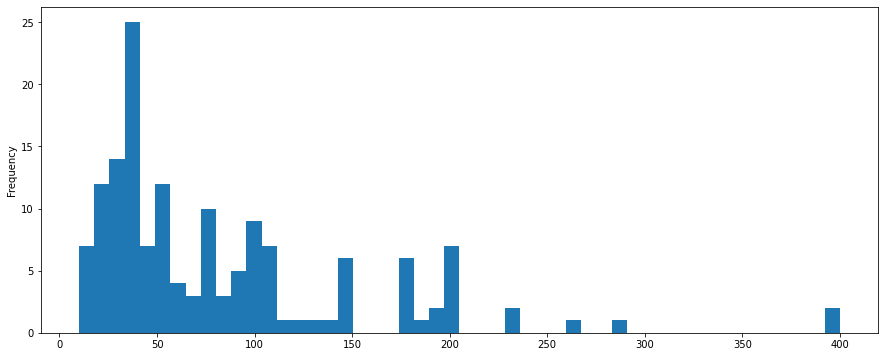

In [24]:
df_highre.price.plot(kind='hist', bins=50, figsize=(15, 6))

- It can be seen that a hand-made product of €400 is very hard to sell
- The most prefered prices are from €10 to €50. They are more reasonable. 

In [25]:
price_bin = df_highre['price'].value_counts(bins=50).sort_values(ascending=False)
price_bin

(33.4, 41.2]      25
(25.6, 33.4]      14
(17.8, 25.6]      12
(41.2, 49.0]      10
(72.4, 80.2]      10
(95.8, 103.6]      9
(49.0, 56.8]       9
(9.609, 17.8]      7
(197.2, 205.0]     7
(103.6, 111.4]     7
(173.8, 181.6]     6
(142.6, 150.4]     6
(88.0, 95.8]       4
(56.8, 64.6]       4
(80.2, 88.0]       4
(64.6, 72.4]       3
(228.4, 236.2]     2
(189.4, 197.2]     2
(392.2, 400.0]     2
(127.0, 134.8]     1
(283.0, 290.8]     1
(119.2, 127.0]     1
(259.6, 267.4]     1
(134.8, 142.6]     1
(111.4, 119.2]     1
(181.6, 189.4]     1
(275.2, 283.0]     0
(150.4, 158.2]     0
(212.8, 220.6]     0
(220.6, 228.4]     0
(236.2, 244.0]     0
(244.0, 251.8]     0
(251.8, 259.6]     0
(267.4, 275.2]     0
(166.0, 173.8]     0
(290.8, 298.6]     0
(298.6, 306.4]     0
(384.4, 392.2]     0
(314.2, 322.0]     0
(376.6, 384.4]     0
(368.8, 376.6]     0
(306.4, 314.2]     0
(361.0, 368.8]     0
(353.2, 361.0]     0
(158.2, 166.0]     0
(337.6, 345.4]     0
(329.8, 337.6]     0
(322.0, 329.8

The more accurate price range are from €30-€41, following by €17-€25.

### Tags used for keeping the product listing on trends by the well performed stores
On any ecommercial web, tags are important for sellers because it helps buyers find the product listing faster (and corectly). We analysize both the title and the tags.

In [26]:
# split title and tags from df1
df_tt= df1['title'].str.split(', ', expand=True) 
df_tag = df1['tags'].str.split(',', expand=True)

#### Tiles

In [27]:
df_tt.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Home portrait,house painting,housewarming gift,our first home sign,home sweet home sign,watercolor home,house portrait,realtor gift,None,None,None,None
1,House Watercolor,Wedding Gift,New Home Gift,First Home,Housewarming Gift,Home Watercolor,New Home Announcement,House Painting,None,None,None,None
2,Personalized Watercolor House Portrait,Hand-Painted Home Portrait,Housewarming Gift,First Home Gift,House Portrait from Photo,None,None,None,None,None,None,None
3,Custom House Portrait,Housewarming Gift,Realtor Closing Gift,Our First Home Gift,Watercolor Home Portrait,Custom Painting From Photo,None,None,None,None,None,None
4,Custom Watercolor House Portrait From Photo,Home Portrait,New Home Housewarming Gift,Our First Home Gift,Personalized Mother's Day Gift,None,None,None,None,None,None,None


In [28]:
# count the frequecy for each tags
tt_col = df_tt.columns
tt = []
for k in tt_col: 
    new_serie = df_tt[k].value_counts()
    tt.append(new_serie)
print(tt)

[Custom House Portrait                                                                                                                            43
Custom Watercolor House Portrait                                                                                                                 16
Custom Watercolor House Portrait,Watercolor House Painting,Personalized Housewarming Gift,First Home Gift,Realtor Closing Gift,Home Portrait     14
Custom Home Portrait                                                                                                                             11
Custom watercolor house portrait                                                                                                                 10
                                                                                                                                                 ..
Framed Canvas Portrait Painting                                                                                

In [29]:
tt = pd.DataFrame(tt)
tt.head()

,Custom House Portrait,Custom Watercolor House Portrait,"Custom Watercolor House Portrait,Watercolor House Painting,Personalized Housewarming Gift,First Home Gift,Realtor Closing Gift,Home Portrait",Custom Home Portrait,Custom watercolor house portrait,Custom house portrait,Custom Watercolor House Portrait From Photo,Watercolor House Portrait,House Portrait,Watercolor house from photo,...,wedding,Personalized,House Photo,handpainted,Present,5x7,nocturne,dad gift,Christmas Gift,9x12
0,43.0,16.0,14.0,11.0,10.0,10.0,9.0,7.0,6.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,3.0,NaN,1.0,NaN,1.0,NaN,7.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,NaN,NaN,3.0,1.0,NaN,NaN,3.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,3.0,NaN,NaN,NaN,5.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# filter out the most frequently
tt.nunique().sort_values().tail(50)

Personalized House Portrait From Photo    2
Custom Watercolor House                   2
hand painted house portrait               2
watercolor painting                       2
Home Art                                  2
Painting from photo                       2
Watercolor portrait                       2
Watercolor Home Painting                  2
House Warming Gift                        2
Custom Artwork                            2
Housewarming or Realtor Closing Gift!     2
Custom House Portrait                     2
First Home New Home Gift                  2
House Painting                            2
Modern Calligraphy                        2
Home Painting                             2
11x14                                     2
painting of home                          2
new home gift                             2
Watercolor                                2
house painting                            2
Housewarming gift                         2
New Home Gift                   

Our store can pick from 4 to 6 keywords from the list above to make an easily searchable title products.

#### Tags

In [31]:
df_tag.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,Home portrait,house painting,housewarming gift,our first home sign,home sweet home sign,watercolor home,house portrait,realtor gift,house closing gift,home print,...,None,None,None,None,None,None,None,None,None,None
1,Christmas gift,House portrait,house watercolor,house painting,home painting,first house,custom house,watercolor house,house illustration,New Home Gift,...,None,None,None,None,None,None,None,None,None,None
2,Painting Watercolor,house portrait,portrait digital,house painting,house sketch,custom portrait,house ornament,home portrait,Housewarming Gift,First Home Gift,...,None,None,None,None,None,None,None,None,None,None
3,Realtor Closing Gift,New Home Gift,Custom Portrait,watercolor house,personalized drawing,moving away gift,portrait from photo,home illustration,First Home Gift,housewarming gift,...,None,None,None,None,None,None,None,None,None,None
4,house painting,custom home portrait,housewarming gift,house portrait,first home gift,new home gift,our first home,new house gift,realtor closing gift,watercolor house,...,None,None,None,None,None,None,None,None,None,None


In [32]:
# count the frequecy for each tags
tag_col = df_tag.columns
tag = []
for i in tag_col: 
    new_series = df_tag[i].value_counts()
    tag.append(new_series)
    #print(tag)
print(tag)

[house portrait         65
housewarming gift      40
painting from photo    26
custom portrait        21
house painting         17
                       ..
Home Portrait           1
Custom pet portrait     1
digital print           1
Wedding Gift            1
Portrait                1
Name: 0, Length: 169, dtype: int64, house portrait          48
watercolor painting     34
House Portrait          33
housewarming gift       30
house painting          20
                        ..
prints                   1
watercolour portrait     1
Hand Drawn Portrait      1
Landscape painting       1
office decoration        1
Name: 1, Length: 173, dtype: int64, house painting          45
house portrait          28
House Portrait          26
custom home portrait    22
housewarming gift       21
                        ..
our first home           1
fater's day              1
House Warming            1
personalise              1
cabin decoration         1
Name: 2, Length: 196, dtype: int64, house paint

In [33]:
tag = pd.DataFrame(tag)
tag.head()

,house portrait,housewarming gift,painting from photo,custom portrait,house painting,Housewarming Gift,House Portrait,Custom House,watercolor painting,Custom Home Portrait,...,New Neighbor Gift,bridge artwork,new home gift,roebling bridge art,Family Gift,Gifts for her,House That Built Us,From Photos,perfect gift,watercolor frame
0,65.0,40.0,26.0,21.0,17.0,16.0,16.0,16.0,14.0,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,48.0,30.0,5.0,8.0,20.0,16.0,33.0,3.0,34.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28.0,21.0,6.0,3.0,45.0,13.0,26.0,3.0,10.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26.0,31.0,6.0,16.0,33.0,23.0,6.0,16.0,7.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,22.0,29.0,15.0,6.0,15.0,14.0,9.0,NaN,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are a huge number of tags (1396).

In [34]:
# filter out the most frequently
tag.nunique().sort_values().tail(50)

wedding gift             5
painting                 5
our first home gift      5
Housewarming             5
watercolor portrait      5
anniversary gift         5
House painting           5
house drawing            6
house watercolor         6
custom                   6
home                     6
home illustration        6
Watercolor House         6
custom home painting     6
New Home Gift            6
closing gift             6
gift                     6
watercolor home          6
Custom House             6
First Home Gift          6
new homeowner gift       6
Home Portrait            6
custom house             7
housewarming             7
Watercolor Painting      7
home painting            7
watercolor               7
Realtor Closing Gift     7
House Painting           8
moving gift              8
personalized gift        8
portrait from photo      8
custom painting          9
painting from photo      9
realtor gift             9
house illustration       9
custom portrait         10
H

- Shop can use the list of keywords/tags for the the description part on the web.

### How many are Etsy pick stores?

In [35]:
# take out a sub sample
df_highre['Etsy pick'].value_counts()

no     141
yes      9
Name: Etsy pick, dtype: int64

It is unessesary to get 'Etsy pick' badge to become best sellers. 

### How fast a store can develope? Revenues vs released date of the product

In [36]:
df_highre.head()

,title,price,weekly_sales,total_sales,reviews,favorites,tags,Ship From,release time,Best Seller,...,store name,product_url,year,es_revenue,today,days,0,1,2,months
0,"Home portrait, house painting, housewarming gi...",24.99,21,587,89,1508,"Home portrait,house painting,housewarming gift...",United States,NaN,yes,...,WAIdecor,https://www.etsy.com/listing/1176417219/home-p...,NaT,14669.13,2022-05-02,NaN,NaN,NaN,NaN,NaN
1,"House Watercolor, Wedding Gift, New Home Gift,...",130.00,20,1119,110,37921,"Christmas gift,House portrait,house watercolor...",United States,2019-10-14,no,...,PublicHouseCo,https://www.etsy.com/listing/469680938/house-w...,2019-10-14,145470.00,2022-05-02,931.0,2019,10,14,31.033333
2,"Personalized Watercolor House Portrait, Hand-P...",29.50,20,3184,804,7026,"Painting Watercolor,house portrait,portrait di...",United States,2020-07-01,yes,...,Latoyaer,https://www.etsy.com/listing/818493954/persona...,2020-07-01,93928.00,2022-05-02,670.0,2020,07,01,22.333333
3,"Custom House Portrait, Housewarming Gift, Real...",14.49,14,723,296,1239,"Realtor Closing Gift,New Home Gift,Custom Port...",United States,2021-08-07,yes,...,ArtistQuality,https://www.etsy.com/listing/1062203471/custom...,2021-08-07,10476.27,2022-05-02,268.0,2021,08,07,8.933333
4,"Custom Watercolor House Portrait From Photo, H...",26.06,10,459,67,1193,"house painting,custom home portrait,housewarmi...",Canada,2021-07-23,yes,...,Premvy,https://www.etsy.com/listing/1055153214/custom...,2021-07-23,11961.54,2022-05-02,283.0,2021,07,23,9.433333


Text(0.5, 0, 'revenues')

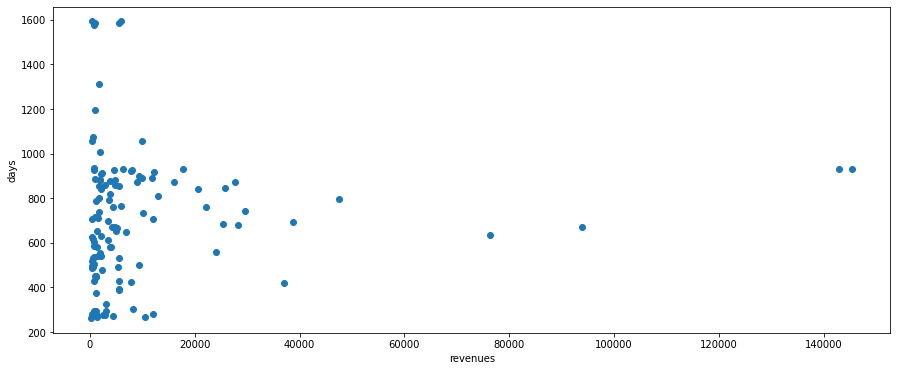

In [37]:
plt.figure(figsize=(15,6))
plt.scatter(df_highre['es_revenue'],df_highre['days'])
plt.ylabel('days')
plt.xlabel('revenues')

- Most of stores existed for a long time does not mean the revenue will increase.

### Is the number of reviews/favorites highly correlated with revenue?

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Revenue vs favories')

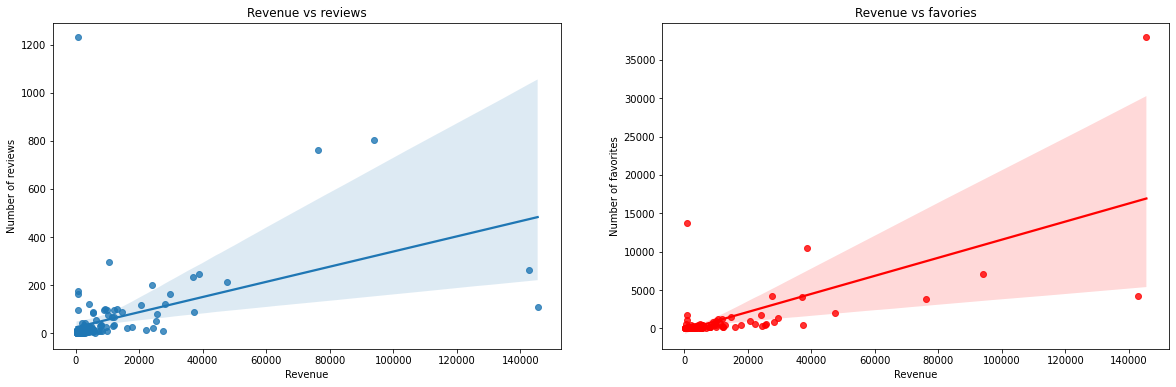

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

sns.regplot(df_highre['es_revenue'], df_highre['reviews'], ax=ax[0])
ax[0].set_xlabel('Revenue')
ax[0].set_ylabel('Number of reviews')
ax[0].set_title('Revenue vs reviews')

sns.regplot(df_highre['es_revenue'], df_highre['favorites'], color='red', ax=ax[1])
ax[1].set_xlabel('Revenue')
ax[1].set_ylabel('Number of favorites')
ax[1].set_title('Revenue vs favories')

- Obviously, more reviews brings more revenues, but when stores having more and more sales, the number of reviews does not need to increase fast with the same speed.
- Same for the relationship between revenue and favorites.

### Can reduce prices make more sales/favorites/reviews?

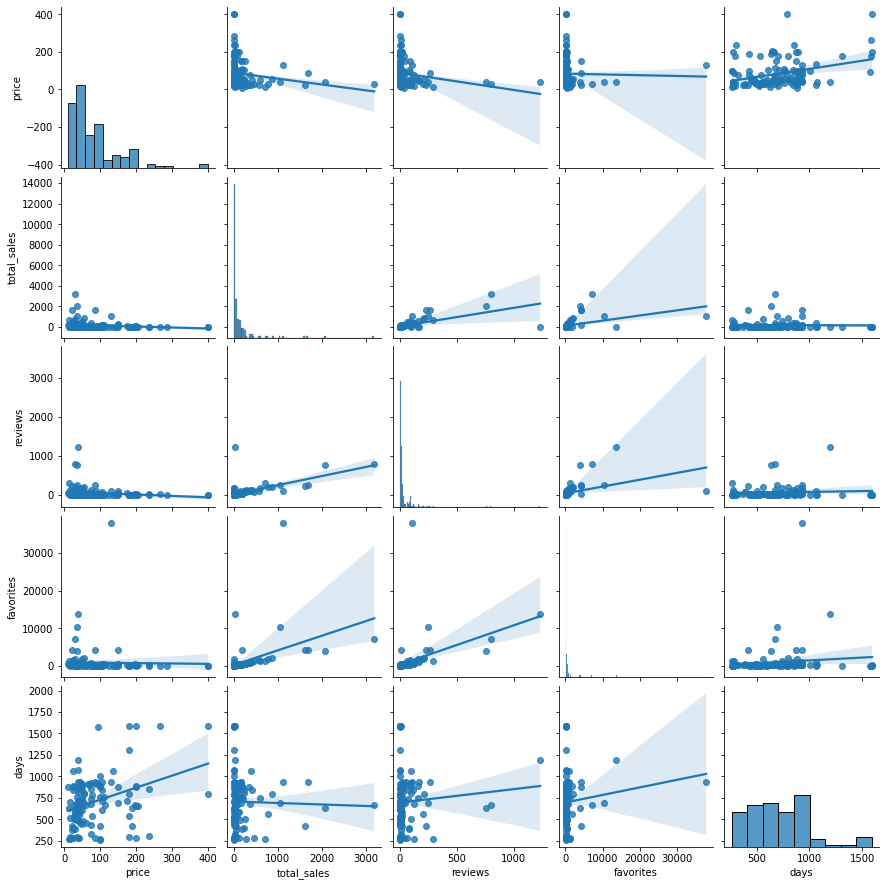

In [39]:
sns.pairplot(df_highre, vars=['price', 'total_sales', 'reviews', 'favorites', 'days'], diag_kind= 'hist', kind="reg")

- Focus on the first column showing the relationship between *price* and others, it can be seen that for the well performed stores increasing prices is not the main factor to boost the business development.
- The histograms on the diagonal show that all features are right skewed. Obviously the competition is high on the markets, just a few stores can make profit exceptional high.

# Other questions

- We still need to clarify the questions below (with more data collected) 
    - Who are your customers?
    - What benefits do they seek?
    - What features will make your product more attractive to them?
    - Which channels are best for reaching them?
    - How to price, place and promote your product?
    - What time of the year is the peak of sales?
    
- I am on my way to acrapping more data to answer these questions. Keep updated!